<a href="https://colab.research.google.com/github/chipembere/Assignment_1/blob/master/3rd__iterarion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install trendln
!pip install catboost
!pip install imblearn
# !pip install fancyimpute
# !pip install impyute

  Created wheel for trendln: filename=trendln-0.1.10-py2.py3-none-any.whl size=19497 sha256=5e75d9674244d2ed3f8026d75c35dd2fc61cf9e5c82dedced50a779fffb3872d
  Stored in directory: /root/.cache/pip/wheels/1b/78/69/2331a0857107f4cb809557e350e151b134497512611cd719b2
  Created wheel for findiff: filename=findiff-0.8.0-cp36-none-any.whl size=13015 sha256=852ff95e3b384fb9a56bc5e85cd65e68dd2f440f30bab1c030e3b821c3335f09
  Stored in directory: /root/.cache/pip/wheels/1a/6b/70/530ad7a4513e3c750abd5b3010abde5edd9904652488fceda8
Successfully built trendln findiff
     |████████████████████████████████| 64.8MB 58kB/s 


In [0]:
# from utils import *
import trendln
import time
import numpy as np

# from mxnet import nd, autograd, gluon
# from mxnet.gluon import nn, rnn
# import mxnet as mx
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
# from impyute.imputation.cs import fast_knn

import math
from scipy.signal import argrelextrema
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import scipy.optimize
from scipy.optimize import OptimizeWarning
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,f1_score, average_precision_score
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import InstanceHardnessThreshold,ClusterCentroids
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
import concurrent
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids

# Import libraries
import os
import sys
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import normalize
import warnings

warnings.filterwarnings("ignore")
scaler = MinMaxScaler(feature_range=(0, 1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
class holder:
    1
def detrend(data):
    method = 'difference'
    if method == 'difference':
        detrended = data.close[1:] - data.close[:-1].values
    elif method == 'linear':

        x = np.arange(0, len(data))
        y = data.close.values

        model = LinearRegression()
        model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
        trend = model.predict(x.reshape(-1, 1))
        trend = trend.reshape((len(data), ))
        detrended = data.close - trend
    else:
        print('Input valid method.')

    return detrended

def fseries(x, a0, a1, b1, w):
    f = a0 + a1 * np.cos(w * x) + b1 * np.sin(w * x)
    return f

def sseries(x, a0, b1, w):
    s = a0 + b1 * np.sin(w * x)
    return s

def inner_fourier(data):
    period = data[1]
    prices = data[0]
    method = 'difference'
    detrended = detrend(prices)
    dit = {}
    plot = False
    coeffs = []
    with concurrent.futures.ProcessPoolExecutor() as xq:
        adoscDict = xq.map(compute_fft, prices)

def compute_fft(data):
    period = data[1]
    prices = data[0]
    method = 'difference'
    detrended = detrend(prices)
    dit = {}
    plot = False
    coeffs = []
    x = np.arange(0,period)
    y = detrended 
    y = detrended.iloc[len(prices)-period:len(prices)]
    with warnings.catch_warnings():
                warnings.simplefilter('error', OptimizeWarning)
    try:
        res = scipy.optimize.curve_fit(fseries, x, y)
    except (RuntimeError, OptimizeWarning):
            res = np.empty((1, 4))
            res[0, :] = np.NAN
    if plot == True:
        xt = np.linspace(0, periods[i], 100)
        yt = fseries(xt, res[0][0], res[0][1], res[0][2], res[0][3])

        plt.plot(x, y)
        plt.plot(xt, yt, 'r')

        plt.show()
    coeffs.extend([res[0]])
    return coeffs

def fourier(data):
    prices = data[0]
    periods = data[1]
    method = 'difference'
    results = holder()
    dit = {}
    plot = False
    detrended = detrend(prices)
    
    for i in range(0, len(periods)):
        coeffs = []
        # for j in range(periods[i], len(prices) - periods[i]):
        for j in range(periods[i], len(prices)):
            
            x = np.arange(0, periods[i])
            y = detrended.iloc[j - periods[i]:j]
                            
            with warnings.catch_warnings():
                warnings.simplefilter('error', OptimizeWarning)

                try:
                    res = scipy.optimize.curve_fit(fseries, x, y)
                except (RuntimeError, OptimizeWarning):
                    res = np.empty((1, 4))
                    res[0, :] = np.NAN

            if plot == True:
                xt = np.linspace(0, periods[i], 100)
                yt = fseries(xt, res[0][0], res[0][1], res[0][2], res[0][3])

                plt.plot(x, y)
                plt.plot(xt, yt, 'r')

                plt.show()

            # coeffs = np.append(coeffs, res[0], axis=0)
            coeffs.extend([res[0]])
        warnings.filterwarnings('ignore',
                                category=np.VisibleDeprecationWarning)
        # coeffs = np.array(coeffs).reshape(((len(coeffs) // 4, 4)))
        coeffs = np.array(coeffs)

        df = pd.DataFrame(coeffs,
                          index=prices.iloc[periods[i]:len(prices)].index)
        # df = pd.DataFrame(coeffs, index=prices.iloc[periods[i]:-periods[i]].index)
        df.columns = ['a0', 'a1', 'b1', 'w']
        df = df.fillna(method='bfill')
        dit[periods[i]] = df

    results.coeffs = dit

    return results, dit

def sine(data):
    prices = data[0]
    periods = data[1]
    method = 'difference'
    results = holder()
    dit = {}
    plot = False
    detrended = detrend(prices)

    for i in range(0, len(periods)):
        coeffs = []
        for j in range(periods[i], len(prices) - periods[i]):
            x = np.arange(0, periods[i])
            y = detrended.iloc[j - periods[i]:j]

            with warnings.catch_warnings():
                warnings.simplefilter('error', OptimizeWarning)

                try:
                    res = scipy.optimize.curve_fit(sseries, x, y)
                except (RuntimeError, OptimizeWarning):
                    res = np.empty((1, 3))
                    res[0, :] = np.NAN

            if plot == True:
                xt = np.linspace(0, periods[i], 100)
                yt = sseries(xt, res[0][0], res[0][1], res[0][2])

                plt.plot(x, y)
                plt.plot(xt, yt, 'r')

                plt.show()
            coeffs = np.append(coeffs, res[0], axis=0)
        warnings.filterwarnings('ignore',
                                category=np.VisibleDeprecationWarning)
        coeffs = np.array(coeffs).reshape(((len(coeffs) // 3, 3)))
        df = pd.DataFrame(coeffs,
                          index=prices.iloc[periods[i]:-periods[i]].index)
        df.columns = ['a0', 'b1', 'w']
        df = df.fillna(method='bfill')
        dit[periods[i]] = df

    results.coeffs = dit

    return results, dit

def slopes(data):
    prices = data[0]
    periods = data[1]
    '''
    :param prices: OHLC price data
    :param periods: periods to get the indicator values
    : return: slopes over given periods
    : return: slopes over given periods
    : return: slopes over given periods
    '''

    results = holder()
    slope = {}

    for i in range(0, len(periods)):
        ms = []
        for j in range(periods[i], len(prices) - periods[i]):
            y = prices.high.iloc[j - periods[i]:j].values
            x = np.arange(0, len(y))
            res = stats.linregress(x, y=y)
            m = res.slope
            ms = np.append(ms, m)
        ms = pd.DataFrame(ms, index=prices.iloc[periods[i]:-periods[i]].index)
        ms.columns = ['high']
        slope[periods[i]] = ms
    results.slope = slope

    return results, slope

def adosc(data):
    prices = data[0]
    periods = data[1]
    results = holder()
    accdist = {}
    for i in range(0, len(periods)):
        AD = []
        for j in range(periods[i], len(prices) - periods[i]):
            C = prices.close.iloc[j + 1]
            H = prices.high.iloc[j - periods[i]:j].max()
            L = prices.low.iloc[j - periods[i]:j].min()
            V = prices.AskVol.iloc[j + 1]

            if H == L:
                CLV = 0
            else:
                CLV = ((C - L) - (H - C)) / (H - L)
            AD = np.append(AD, CLV * V)
        AD = AD.cumsum()
        AD = pd.DataFrame(AD,
                          index=prices.iloc[periods[i] + 1:-periods[i] +
                                            1].index)
        AD.columns = ['AD']
        accdist[periods[i]] = AD

    results.AD = accdist

    return results, accdist



In [0]:

def my_ff_series(df):

    adoscKey = [4]
    slopeKey = [20]
    fourierKey = [20,30]
    sineKey = [5]
    keylist = [adoscKey,slopeKey,fourierKey,sineKey]
    # Call all the functions
    with concurrent.futures.ProcessPoolExecutor() as xq:
        adosc_args = [df,adoscKey]
        adoscDict = xq.submit(adosc, adosc_args)
        
        slope_args = [df, slopeKey]
        slopeDict = xq.submit(slopes, slope_args)
        
        fourier_args = [df,fourierKey]
        fourierDict = xq.submit(fourier, fourier_args)
        
        sine_args = [df,sineKey]
        sineDict = xq.submit(sine, sine_args)
    
    # Create list of dictionaries

    dictlist = [
        adoscDict.result()[0].AD,
        slopeDict.result()[0].slope,
        fourierDict.result()[0].coeffs,
        sineDict.result()[0].coeffs
    ]

    # List of 'base' column names:
    colFeat = ['adosc','slope', 'fourier', 'sine'
    ]

    # Populate the MASTERFRAME:
    masterFrame = pd.DataFrame(index=df.index)

    for i in range(0, len(dictlist)):

        if colFeat[i] == 'macd':
            colID = colFeat[i] + str(keylist[6][0]) + str(keylist[6][0])
            masterFrame[colID] = dictlist[i]

        else:

            for j in keylist[i]:

                for k in list(dictlist[i][j]):

                    colID = colFeat[i] + str(j) + k

                    masterFrame[colID] = dictlist[i][j][k]

    threshold = round(0.7 * len(masterFrame))

    masterFrame = masterFrame.merge(df, left_index=True, right_index=True)

    masterFrameCleaned = masterFrame.copy()

    return masterFrameCleaned

def PPSR(dataset_TI_df):  
    PP = pd.Series((dataset_TI_df['high'] + dataset_TI_df['low'] + dataset_TI_df['close']) / 3)  
    R1 = pd.Series(2 * PP - dataset_TI_df['low'])  
    S1 = pd.Series(2 * PP - dataset_TI_df['high'])  
    R2 = pd.Series(PP + dataset_TI_df['high'] - dataset_TI_df['low'])  
    S2 = pd.Series(PP - dataset_TI_df['high'] + dataset_TI_df['low'])  
    R3 = pd.Series(dataset_TI_df['high'] + 2 * (PP - dataset_TI_df['low']))  
    S3 = pd.Series(dataset_TI_df['low'] - 2 * (dataset_TI_df['high'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr) 
    PSR = PSR.set_index(dataset_TI_df.index) 
    dataset_TI_df = dataset_TI_df.join(PSR)  
    return dataset_TI_df

def find_patterns(max_min):  
    patterns = defaultdict(list)
    
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        
        # Pattern must play out in less than n units
        if window.index[-1] - window.index[0] > 100:      
            continue   
            
        a, b, c, d, e = window.iloc[0:5]
                
        # IHS
        if a<b and c<a and c<e and c<d and e<d and abs(b-d)<=np.mean([b,d])*0.02:
               patterns['IHS'].append((window.index[0], window.index[-1]))
        
    return patterns

def peak_detect(price, order=10):
    try:
        # Get the index of maximums and index of minimums
        max_idx = list(argrelextrema(price, np.greater, order=order)[0])
        min_idx = list(argrelextrema(price, np.less, order=order)[0])

        # Reflect current value as a peak
        idx = max_idx + min_idx + [len(price) - 1]
        
        idx.sort()
        """ We are only interested in the last 5 peaks 
        because the patterns we are looking for are
        5 point patterns."""
        current_idx = idx[-5:]  # the last 5 indexes
        
        current_pat = price[current_idx]
        
        start = min(current_idx)
        end = max(current_idx)

        '''
        Round these to 2/3/4/5 decimal places. When you round the live values 
        the similar ones will be easier to find. The rounding makes less sensitive
        but gives us more range meaning the patterns don't have to match exactly,
        the can vary slightly. We may even find 2 decimal places to be very good.
        '''
        XA = round((100 * (current_pat[1] - current_pat[0])/current_pat[0]),3)
        AB = round((100 * (current_pat[2] - current_pat[1])/current_pat[1]),3)
        BC = round((100 * (current_pat[3] - current_pat[2])/current_pat[2]),3)
        CD = round((100 * (current_pat[4] - current_pat[3])/current_pat[3]),3)

        # XA = 100 * (current_pat[1] - current_pat[0])/current_pat[0]
        # AB = 100 * (current_pat[2] - current_pat[1])/current_pat[1]
        # BC = 100 * (current_pat[3] - current_pat[2])/current_pat[2]
        # CD = 100 * (current_pat[4] - current_pat[3])/current_pat[3]

        return XA, AB, BC, CD
    except:
        return np.nan, np.nan, np.nan, np.nan

def pattern_finder(price):
    X1 = []
    X2 = []
    X3 = []
    X4 = []
    # Find Peaks
    for i in range(0, len(price)):

        XA, AB, BC, CD = peak_detect(
            price.values[:i], 9)
        X1.append(XA)
        X2.append(AB)
        X3.append(BC)
        X4.append(CD)

    return X1, X2, X3, X4

def label(x, i):
    '''
        :Params: An array and an index
        Adjust the decimals to balance or specify target.
        Adjust x[i+...] look foward
        :Return: -1,0 or 1 dependending on..
    '''
    try:
        # Adjust this to try and predict only one step ahead or 2/3 according to live
        if (x[i + 3]<(x[i]-(x[i] * 0.0005))):
            return 1 # down
        if (x[i + 3]>(x[i]+(x[i] * 0.0005))):
            return 1 # up
        else:
            return 0 # none
    except:
        return np.nan

def get_trend_label(df,i):
    try:
        if (
            (df[i+1] > (df[i]+(df[i]*0.0001))) &
            (df[i+2] > (df[i+1]+(df[i+1]*0.0001))) &
            (df[i+3] > (df[i+2]+(df[i+2]*0.00008))) 
            ):
            return 1 # up
        if (
            (df[i+1] < (df[i]-(df[i]*0.0001))) &
            (df[i+2] < (df[i+1]-(df[i+1]*0.0001))) &
            (df[i+3] < (df[i+2]-(df[i+2]*0.00008)))
            ):
            return 0 # down
        else:
            return np.nan # none
    except:
        return np.nan

def trend_labels(df,i):
    try:
        if (
            (df[i+1] > (df[i]+(df[i]*0.0002))) &
            (df[i+2] > (df[i+1]+(df[i]*0.0001))) & 
            (df[i+3] > (df[i+2]+(df[i]*0.0001))) 
            ):
            return 1 # up
        if (
            (df[i+1] < (df[i]-(df[i]*0.0002))) &
            (df[i+2] < (df[i+1]-(df[i]*0.0001))) & 
            (df[i+3] < (df[i+2]-(df[i]*0.0001))) 
            ):
            return 2 # down
        else:
            return 0 # none
    except:
        return np.nan

def get_labels(df):
    labels = []
    for x in range(0,len(df)):
        q = label(df,x)
        labels.append(q)
    return labels

def get_trend_labels(df):
    labels = []
    for i in range(0,len(df)):
        q = get_trend_label(df,i)
        labels.append(q)
    return labels
        
def get_technical_indicators(dataset):

    min_out = 5
    dataset = dataset[["open", "high", "low", "close", "AskVol"]].transform(lambda x: x.ewm(span = min_out).mean())

    # Create true range and average true range
    dataset['tr'] = dataset['high'].subtract(dataset['low']).rolling(window=7).mean()
    dataset['atr'] = dataset['tr'].ewm(span=10).mean()

    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['upper_band'] = dataset['close'].rolling(window=20).mean() + dataset['close'].rolling(window=20).std()*2
    dataset['lower_band'] = dataset['close'].rolling(window=20).mean() - dataset['close'].rolling(window=20).std()*2

    dataset['20sd'] = dataset['close'].rolling(window=20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['close']-1

    # Last price change
    dataset['change_in_price'] = dataset['close'].diff(1)

    # Difference with previous values
    dataset['Diff1'] = dataset['close'].diff().values
    dataset['Diff2'] = dataset['close'].diff(1).values
    dataset['Diff3'] = dataset['close'].diff(2).values
    dataset['Diff4'] = dataset['close'].diff(3).values

    # True values and average true values
    dataset['Tr'] = dataset['high'].subtract(dataset['low']).rolling(14).mean()
    dataset['Atr'] = dataset['Tr'].ewm(span=10).mean()

    # Calculate the Rate of Change in the Price, and store it in the Data Frame.
    dataset['Price_Rate_Of_Change'] = dataset['close'].transform(lambda x: x.pct_change(periods = 5))

    # Calculate the 30min RSI
    n = 5

    # First make a copy of thedataset frame twice
    up_df, down_df = dataset[['change_in_price']].copy(),dataset[['change_in_price']].copy()

    # For up days, if the change is less than 0 set to 0.
    up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0

    # For down days, if the change is greater than 0 set to 0.
    down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0

    # We need change in price to be absolute.
    down_df['change_in_price'] = down_df['change_in_price'].abs()

    # Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
    ewma_up = up_df['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
    ewma_down = down_df['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

    # Calculate the Relative Strength
    relative_strength = ewma_up / ewma_down

    # Calculate the Relative Strength Index
    relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

    # Add the info to the main dataset frame.
    dataset['down_sticks'] = down_df['change_in_price']
    dataset['up_sticks'] = up_df['change_in_price']
    dataset['RSI'] = relative_strength_index

    # Calculate the Williams %R
    n = 5

    # Make a copy of the high and low column.
    low_5, high_5 = dataset[['low']].copy(), dataset[['high']].copy()

    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_5 = low_5['low'].transform(lambda x: x.rolling(window = n).min())
    high_5 = high_5['high'].transform(lambda x: x.rolling(window = n).max())

    # Calculate William %R indicator.
    r_percent = ((high_5 - dataset['close']) / (high_5 - low_5)) * - 100

    # Add the info to the data frame.
    dataset['r_percent'] = r_percent

    # Calculate the Stochastic Oscillator
    n = 3

    # Make a copy of the high and low column.
    low_14, high_14 = dataset[['low']].copy(), dataset[['high']].copy()

    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_14 = low_14['low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14['high'].transform(lambda x: x.rolling(window = n).max())

    # Calculate the Stochastic Oscillator.
    k_percent = 100 * ((dataset['close'] - low_14) / (high_14 - low_14))

    # Add the info to the data frame.
    dataset['low_14'] = low_14
    dataset['high_14'] = high_14
    dataset['k_percent'] = k_percent

    '''
    fft could be good for regression tasks
    '''

    # data_FT = dataset[['close']]
    # data_FT = data_FT.set_index(data.index)
    dataset['close_fft'] = np.fft.fft(np.asarray(dataset['close'].tolist()))
    dataset['absolute'] = dataset['close_fft'].apply(lambda x: np.abs(x))
    dataset['angle'] = dataset['close_fft'].apply(lambda x: np.angle(x))
    dataset.drop(['close_fft'], axis=1)
    # My Fourier and sine
    
    dataset['XA'], dataset['AB'], dataset['BC'], dataset['CD'] = pattern_finder(dataset.close)

    dataset = my_ff_series(dataset)
    #Support and resistance 
    # Find local peaks
    # dataset['min'] = dataset.close[(dataset.close.shift(1) > dataset.close) & (dataset.close.shift(-1) > dataset.close)]
    # dataset['max'] = dataset.close[(dataset.close.shift(1) < dataset.close) & (dataset.close.shift(-1) < dataset.close)]

    # n=5 # number of points to be checked before and after 
    # # Find local peaks
    # dataset['min2'] = dataset.iloc[argrelextrema(dataset.close.values, np.less_equal, order=n)[0]]['close']
    # dataset['max2'] = dataset.iloc[argrelextrema(dataset.close.values, np.greater_equal, order=n)[0]]['close']

    # dataset['mins'], dataset['maxs'] = calc_support_resistance((dataset[-1000:].Low, dataset[-1000:].High))

    return dataset

def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()
    plt.show()

In [0]:
# Load data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traded_ai/data/btc_usdt_5min_cs.csv')
data.columns = ["Datetime", "open", "high", "low", "close", "AskVol"]
data = data.set_index(data.Datetime)
data = data[["open", "high", "low", "close", "AskVol"]]
data = data.drop_duplicates(keep=False)
data =data.sort_index()
data = data#.iloc[:500]

Mounted at /content/drive


(array([44849.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 48231.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

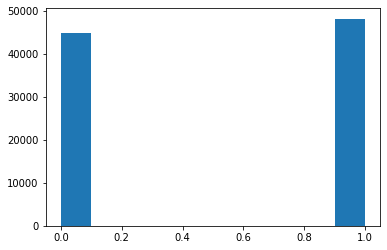

In [0]:
# Add features
dataset_TI_df = get_technical_indicators(data)
dataset_TI_df = dataset_TI_df.set_index(data.index)
LL = PPSR(dataset_TI_df)
df = pd.concat([dataset_TI_df,LL.PP,LL.R1,LL.S1,LL.R2,LL.S2,LL.R3,LL.S3],axis=1) 
df = my_ff_series(df)
df = df.drop(['close_fft'], axis=1)
df['result'] = get_trend_labels(df.close.values)
df = df.drop(['adosc4AD_x','slope20high_x', 
              'sine5a0_x', 'sine5b1_x', 'sine5w_x', 
              'adosc4AD_y', 'slope20high_y',
              'sine5a0_y', 'sine5b1_y', 'sine5w_y'
              ], axis=1)
df.to_csv('/content/drive/My Drive/Colab Notebooks/traded_ai/data/btc_usdt_5min_cs_2trend_labels.csv')
plt.hist(df.result)

In [0]:
df = df.drop(['adosc4AD_x','slope20high_x', 
              'sine5a0_x', 'sine5b1_x', 'sine5w_x', 
              'adosc4AD_y', 'slope20high_y',
              'sine5a0_y', 'sine5b1_y', 'sine5w_y'
              ], axis=1)

In [0]:
import pandas as pd
print(df.columns)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traded_ai/data/btc_usdt_5min_cs_2trend_labels.csv')
df[['close','Diff1','fourier20b1_x','ema','r_percent','CD']].tail(60)
# print(df.iloc[-1])
# df.ema.iloc[-1]
# 9255.341285

Index(['Datetime', 'fourier20a0_x', 'fourier20a1_x', 'fourier20b1_x',
       'fourier20w_x', 'fourier30a0_x', 'fourier30a1_x', 'fourier30b1_x',
       'fourier30w_x', 'fourier20a0_y', 'fourier20a1_y', 'fourier20b1_y',
       'fourier20w_y', 'fourier30a0_y', 'fourier30a1_y', 'fourier30b1_y',
       'fourier30w_y', 'open', 'high', 'low', 'close', 'AskVol', 'tr', 'atr',
       'ma7', 'ma21', '26ema', '12ema', 'MACD', 'upper_band', 'lower_band',
       '20sd', 'ema', 'momentum', 'change_in_price', 'Diff1', 'Diff2', 'Diff3',
       'Diff4', 'Tr', 'Atr', 'Price_Rate_Of_Change', 'down_sticks',
       'up_sticks', 'RSI', 'low_14', 'high_14', 'k_percent', 'absolute',
       'angle', 'XA', 'AB', 'BC', 'CD', 'PP', 'R1', 'S1', 'R2', 'S2', 'R3',
       'S3', 'result'],
      dtype='object')


,close,Diff1,fourier20b1_x,ema,r_percent,CD
241117,9207.860312,9.694844,-6.108301,9201.555031,-5.233689,1.767
241118,9216.206875,8.346563,10.690224,9211.322927,-10.484698,1.875
241119,9217.367917,1.161042,-11.248828,9215.352920,-14.097090,1.967
241120,9215.638611,-1.729306,-12.042558,9215.543381,-19.498217,1.980
241121,9218.202407,2.563796,-12.864188,9217.316065,-21.584243,-0.019
241122,9216.168272,-2.034136,-13.616043,9216.550869,-34.774708,1.989
241123,9218.232181,2.063909,-4.704090,9217.671744,-33.692019,-0.022
241124,9225.108121,6.875940,-1.860015,9222.629328,-20.564878,1.989
241125,9231.768747,6.660626,3.820188,9228.722274,-16.345122,2.065
241126,9243.145831,11.377084,-4.044817,9238.337979,-10.523291,2.139


In [0]:
# plot_technical_indicators(dataset_TI_df, 200)
# df.plot(df['t'],df.index)

What are you trying to get the model predict?

*   Yoc could try to predict swings. and there are different ways to do this
*  One way is to look for a trend, lower lows higher highs another way is to use percentage increase.
*   You could also try and cluster the data first. thus slassing it that way.

It is important to look for patterns that are commom on a daily basis. more opportunity.



In [0]:
# df.to_csv('/content/drive/My Drive/Colab Notebooks/traded_ai/data/labelled_fxcm5mLTCUSD.csv')
# df.columns

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traded_ai/data/5m_btcusdt_cc_l.csv')
df = df.dropna()
print(df.isnull().sum())

Datetime         0
fourier20a0_x    0
fourier20a1_x    0
fourier20b1_x    0
fourier20w_x     0
                ..
R2               0
S2               0
R3               0
S3               0
result           0
Length: 62, dtype: int64


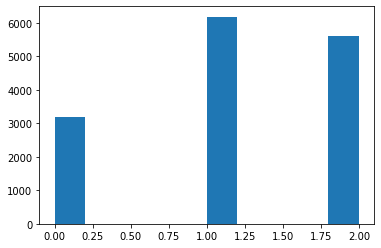

In [0]:
# Split the data.
df1 = df.iloc[:15000]
df2 = df.iloc[15000:]
# Features
X_ = df1.iloc[:,1:-1]
columns = X_.columns
X_Cols  = df1.iloc[:,1:-1].values
Y_Cols = df1.iloc[:,-1]

#V Visualise Classes
plt.hist(Y_Cols)
plt.show()

(array([6189.,    0.,    0.,    0.,    0., 6189.,    0.,    0.,    0.,
        6189.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

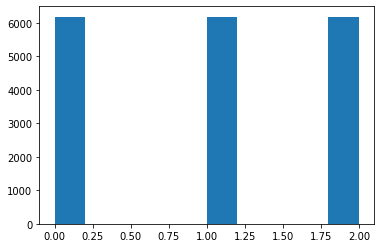

In [0]:
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import AllKNN 
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids
import matplotlib.pyplot as plt


# Separate input features and target
y = Y_Cols
X = X_Cols#.values
# the methods to resample
iht = InstanceHardnessThreshold(random_state=42)
cnn = CondensedNearestNeighbour(random_state=42,sampling_strategy='majority')
knn = AllKNN(random_state=42)
ada = ADASYN(random_state=42)
bls = BorderlineSMOTE(random_state=42)
# X, y = sm.fit_resample(X, y)
# X, y = iht.fit_resample(X, y)
# X, y = sm.fit_resample(X, y)

cc = ClusterCentroids(random_state=42)
X, y = bls.fit_resample(X_Cols, Y_Cols)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30, random_state=42)
plt.hist(y)

In [0]:
from catboost import CatBoostClassifier, Pool, cv

In [0]:
model = CatBoostClassifier( loss_function = 'MultiClass',
                           learning_rate = 0.001,
                           random_state = 0,
                           verbose = False,
                           iterations = 50,
                           depth = 10,
                           od_type="Iter"
                           )

model.fit(X_train,y_train)

preds_class = model.predict(X_test)

preds_proba = model.predict_proba(X_test)
print(model.score(X_test,y_test))
print(model.get_best_score())

f1s = f1_score(y_test, preds_class, average='weighted')
print(f"{f1s}: is the weighted f1 score.")

0.6740262071441393
{'learn': {'MultiClass': 1.068614140198301}}
0.677293074020752: is the weighted f1 score.


Accuracy: 0.7446278417938337
Percision: 0.8204108681245859
Recall: 0.6927811975377728
Specificity: 0.8096910112359551


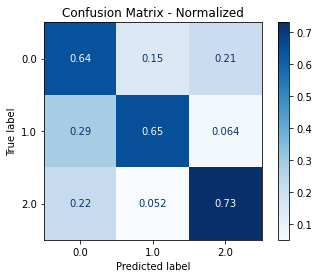

1    78.243011
2    11.863105
0     9.893884
dtype: float64

In [0]:
# Define the traget names
target_names = ['MoveUp', 'None', 'MoveDown']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = preds_class, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(y_test, preds_class)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

disp = plot_confusion_matrix(model, X_test, y_test, normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()
feature_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
feature_imp

In [0]:
                            ''' Sanity Check '''
X_Cols = df2.iloc[:,1:-1]
Y_Cols = df2.iloc[:,-1]

y = Y_Cols
X = X_Cols.values
# X = normalize(X) 
scaler.fit(X)
scaled_data = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# Make predictions
y_pred = model.predict(X)

# Print the Accuracy of our model.
print('Correct Prediction (%): ', accuracy_score(y, model.predict(x_pca), normalize = True) * 100.0)
f1s = f1_score(y_test, preds_class, average='weighted')
print(f"{f1s}: is the weighted f1 score.")

Correct Prediction (%):  72.65816403244209
0.677293074020752: is the weighted f1 score.


This is saying for this type of swing prediction volume and macd are very important.

One can use harmonic patterns to find out when there will be a change and volume, macd, atr to figure out for how long. Fft can also help with predicting direction.

TODO

1) using peaker find peaks.
2) find the differences between those beaks (XA = A - X) up to 7 and save
3) for i in dataset mark 1 if i marks the start of a 10min trend up or down
4) mark zero for no trend/swing.
5) train model.
6) deploy with some conditions.


In [0]:
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traded_ai/data/5m_train_3_no_classes.csv')

In [0]:

# X_Cols = df2.iloc[:,1:-1]
# Y_Cols = df2.iloc[:,-1]

# y = Y_Cols
# X = X_Cols.values
# X = normalize(X) 

# # Make predictions
# y_pred = model.predict(X)

# # Print the Accuracy of our model.
# print('Correct Prediction (%): ', accuracy_score(y, model.predict(X), normalize = True) * 100.0)
# plt.hist(Y_Cols)
# plt.show()

Accuracy: 0.7630026899236463
Percision: 0.5778992581023038
Recall: 0.03445546398472785
Specificity: 0.9920866732550053


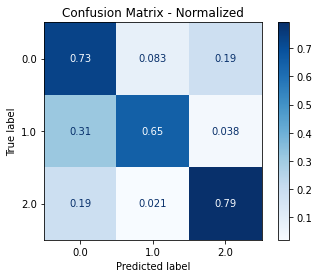

In [0]:
# # Define the traget names
# target_names = ['down', 'none', 'up']

# Build a classifcation report
report = classification_report(y_true = y, y_pred = y_pred, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(y, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

disp = plot_confusion_matrix(model, x_pca, y, normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

In [0]:
model.save_model('/content/drive/My Drive/Colab Notebooks/traded_ai/models/btcusdt_catb_model2',format="cbm")

NameError: ignored

In [0]:
model=CatBoostClassifier()
model.load_model('/content/drive/My Drive/Colab Notebooks/traded_ai/models/btcusdt_catb_model2',format="cbm")
X_Cols = df2.iloc[:,1:-1]
X = X_Cols.iloc[-1]
pred = model.predict(X)
print(pred)

CatBoostError: ignored

In [0]:
import requests

class Finn_Stock:

    def __init__(self):
        self.base_url ='https://finnhub.io/api/v1/'
        self.api_key = 'bqemha7rh5rashj9148g'

    def get_support_res(self, symbol):
        
        ''' 
        :Accepts string symbol:
        Returns a response:
        '''
        return requests.get(f'{self.base_url}/scan/pattern?symbol={symbol}\
                            &resolution=5min&token={self.api_key}')
finn_class = Finn_Stock()
get_sup_res = finn_class.get_support_res('AAPL')
r = get_sup_res
# with concurrent.futures.ProcessPoolExecutor() as x:
#     support_res = x.submit(get_sup_res,'AAPL')

print(r)

<Response [502]>


In [0]:
r = requests.get('https://finnhub.io/api/v1/scan/pattern?symbol=AAPL&resolution=D&token=bqemha7rh5rashj9148g')
print(r.json())